In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load density data
density_old = pd.read_csv("s3://w210-poverty-mapper/modeling/metadata/source_data/total_meta_data_full_updated_density.csv")
density = pd.read_csv("s3://w210-poverty-mapper/modeling/metadata/source_data/meta_data_full_updated_density_new_full_value_LZ.csv")

In [4]:
print(density_old.shape)
print(density.shape)

(156656, 8)
(156656, 8)


In [6]:
print(density_old[density_old["Density"] > 0].shape)
print(density[density["Density"] >= 5].shape)

(0, 8)
(122456, 8)


In [7]:
print(density[density["Density"] >= 50].shape)

(122456, 8)


In [5]:
density["Density"].describe()

count    156656.000000
mean       2111.864277
std        8309.455343
min           0.000000
25%          76.142755
50%         493.747025
75%        2050.402023
max      629881.207000
Name: Density, dtype: float64

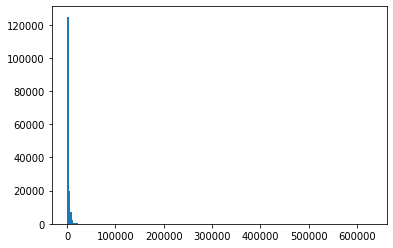

In [6]:
plt.hist(density["Density"], bins=200)
plt.show()

In [7]:
# Keep observations where density is less than or equal to threshold percentile value
top_percentile = 0.95
top_percentile_value = density["Density"].quantile(top_percentile)
remove_outliers = density[density["Density"] < top_percentile_value]

print(top_percentile_value)
print(remove_outliers.shape)

7477.5809935
(148823, 8)


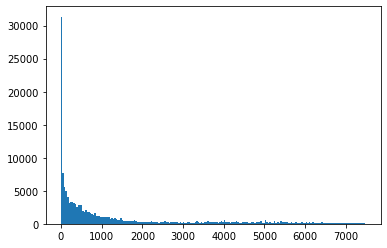

In [8]:
plt.hist(remove_outliers["Density"], bins=200)
plt.show()

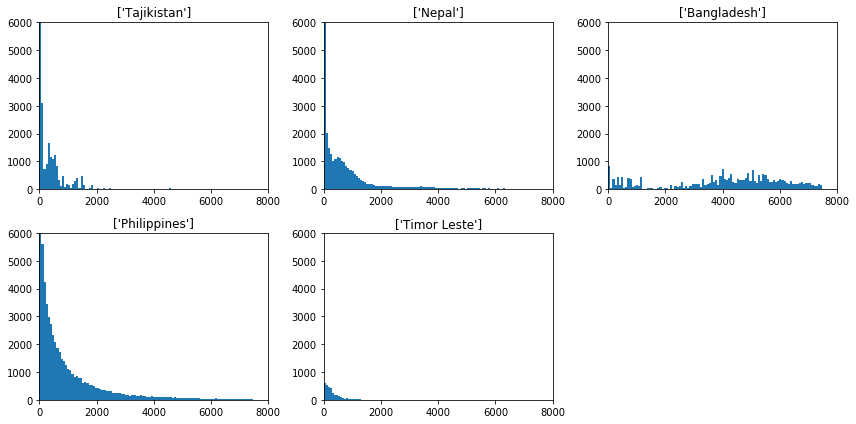

In [9]:
# Plot histograms by country
fig = plt.figure(figsize=(12,6))

country_list = [c for c in remove_outliers["countries"].unique()]

for country, num in zip(country_list, range(1,6)):
    ax = fig.add_subplot(2,3,num)
    ax.hist(remove_outliers["Density"][remove_outliers["countries"] == country], bins=100)
    ax.set_title(country)
    ax.set_ylim([0, 6000])
    ax.set_xlim([0, 8000])

plt.tight_layout()
plt.show()

In [10]:
# Plot bottom percentiles 
bottom_percentile = 0.25
bottom_percentile_value = density["Density"].quantile(bottom_percentile)
low_population = density[density["Density"] < bottom_percentile_value]

print(bottom_percentile_value)
print(low_population.shape)

76.14275455
(39162, 8)


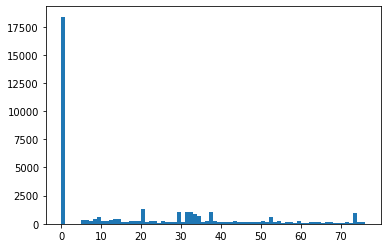

In [11]:
# Plot low population values
plt.hist(low_population["Density"], bins=76)
plt.show()

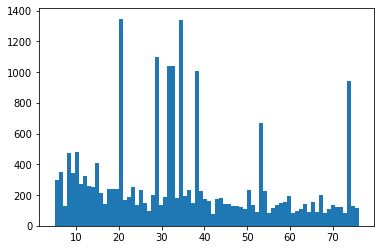

In [12]:
# Plot low population values without zeros
low_population_no_zero = low_population[low_population["Density"] > 0]
plt.hist(low_population_no_zero["Density"], bins=76)
plt.show()

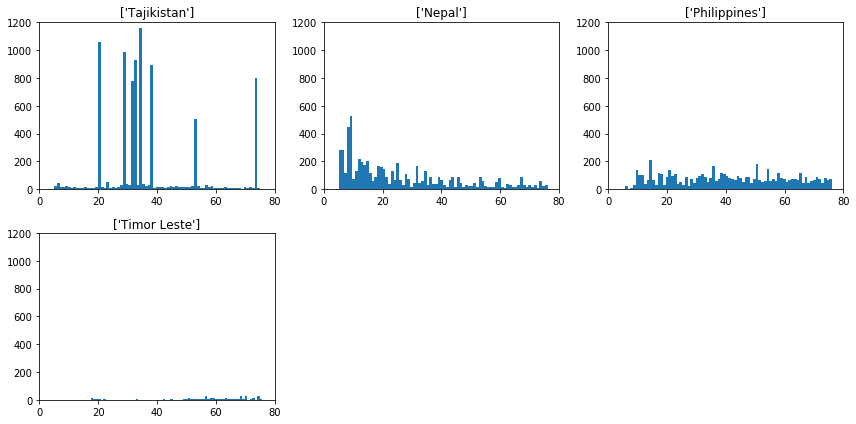

In [13]:
# Plot histograms of low values without zero by country
fig = plt.figure(figsize=(12,6))

country_list = [c for c in low_population_no_zero["countries"].unique()]

for country, num in zip(country_list, range(1,6)):
    ax = fig.add_subplot(2,3,num)
    ax.hist(low_population_no_zero["Density"][low_population_no_zero["countries"] == country], bins=76)
    ax.set_title(country)
    ax.set_ylim([0, 1200])
    ax.set_xlim([0, 80])

plt.tight_layout()
plt.show()